In [1]:
import pandas as pd
import numpy as np
import h5py
import analysis_data
run_info =[]

In [2]:
# file = 'outnpy/lv2415_lv2414_9DB_20241103_LED_850v_900mv_1p325_1us_run0.h5df'
# file = 'outnpy/lv2415_lv2414_20241105_LED_1p325_1us_run0.h5df'
# file = 'outnpy/lv2415_lv2414_20241105_9DB_LED_1p325_1us_run0.h5df'
file = 'outnpy/lv2415_lv2414_20241105_LED_1p36_1us_run0.h5df'


In [3]:
# file_date = file.split('LED_')[0].split('9DB_')[1]
file_date = file.split('LED_')[0].split('lv2414_')[1]
led_config = file.split('LED_')[1].split('.h5df')[0]
file_tag = file_date + led_config
file_tag

'20241105_1p36_1us_run0'

In [4]:
df = pd.read_hdf(file, key='winfo')
df.head()

,Ch,TTT,Baseline,Area_S2,S2_width,Wave
0,0,35736,15173,15691.492846,1000,"[15173, 15171, 15179, 15172, 15171, 15175, 151..."
1,1,35736,15325,470.460872,1000,"[15323, 15326, 15329, 15331, 15329, 15325, 153..."
2,2,35736,8113,-453.445771,1000,"[8113, 8106, 8114, 8116, 8107, 8112, 8115, 811..."
3,0,285736,15173,15637.208932,1000,"[15167, 15173, 15169, 15168, 15172, 15170, 151..."
4,1,285736,15326,430.673265,1000,"[15321, 15325, 15326, 15324, 15329, 15323, 153..."


In [5]:
m =3
ch_1 = df.Ch[:][m]
wave_2 = df.Wave[:][m]
baseline_2 = df.Baseline[:][m]
ttt_2 = df.TTT[:][m]
area_2 = df.Area_S2[:][m]

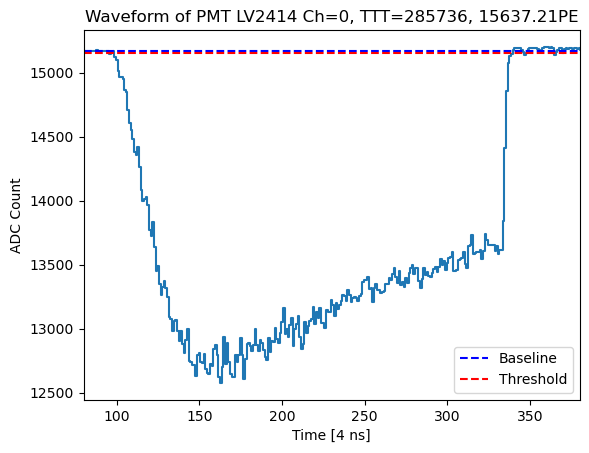

In [17]:
analysis_data.plot_waveform(wave_2, baseline_2, 90,130, 120, 80,380, pmt='LV2414', ch=r'Ch={}'.format(ch_1),  ttt=ttt_2, area=area_2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


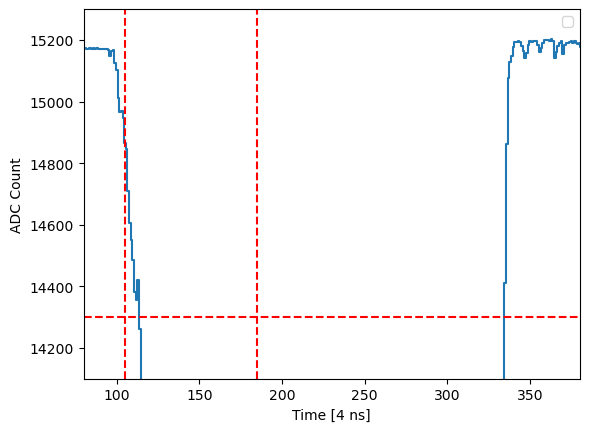

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.step(np.arange(len(wave_2)), wave_2, where='mid')
# plt.axhline(y=14300, color='b', linestyle='--', label='')  # 基线
plt.axhline(y=baseline_2 - 871, color='r', linestyle='--', label='')
plt.axvline(x=105, color='r', linestyle='--', label='')# 阈值
plt.axvline(x=185, color='r', linestyle='--', label='')# 阈值
 # plt.scatter(st, wave[st], color='r', marker='o', label='start')  # 起始点
# plt.scatter(ed, wave[ed], color='g', marker='o', label='end')  # 结束点
# plt.scatter(lp, wave[lp], color='b', marker='o', label='minpoint')  # 最低点
# plt.title(r'Waveform of PMT {} {}, TTT={}, {:.2f}PE'.format(pmt,ch, ttt, area))
plt.xlabel('Time [4 ns]')
plt.ylabel('ADC Count')
plt.legend()
plt.xlim(80, 380)
plt.ylim(14100,15300)
plt.show()

In [8]:
area_ch0_s2 = df.Area_S2[df.Ch==0 ].astype(np.float64).to_numpy()

In [9]:
mean_ch0 = np.mean(area_ch0_s2)
std_ch0 = np.std(area_ch0_s2)
nbins_ch0 = round(np.max(area_ch0_s2)-np.min(area_ch0_s2))
left_edge_ch0 = np.min(area_ch0_s2)
right_edge_ch0 = np.max(area_ch0_s2)
amplitude_ch0 = len(area_ch0_s2)

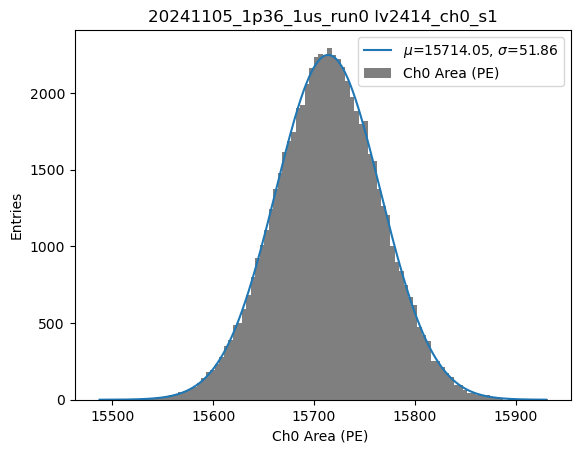

Fit: mu= 15714.05, sigma =51.86


In [10]:
Ch0_s2_mu, Ch0_s2_sigma =  analysis_data.plot_fit_histgram_vs_Gaussion(area_ch0_s2, 100,left_edge_ch0, right_edge_ch0 , [amplitude_ch0, mean_ch0, std_ch0 ], file_tag=file_tag, xlabel='Ch0 Area (PE)', title='lv2414_ch0_s1',Save=False)

In [11]:
run_info.append({
        'Ch0_s2_mu': Ch0_s2_mu,
        'Ch0_s2_sigma' : Ch0_s2_sigma,
        'S2_width': 1000,
        'file_tag': file_tag,            
    })

In [12]:
df = pd.DataFrame(run_info)
df[0:]

,Ch0_s2_mu,Ch0_s2_sigma,S2_width,file_tag
0,15714.052338,51.863811,1000,20241105_1p36_1us_run0


In [13]:
# import process_data
# import pandas as pd
# # path = r'outnpy/{}.h5py'.format(file_tag)
# path = 'outnpy/S2_1us_1.36V_with_whithout_attenuator_202241106_1436.h5py'
# process_data.write_to_hdf5(df, path)


h5 Write Time: 0.01 s 
h5 File Size: 1.03 MB
Save to outnpy/S2_1us_1.36V_with_whithout_attenuator_202241106_1436.h5py


(0.012160778045654297, 1080934)